# Dataset Exploration
In this notebook, we explore the time series segmentation datasets.

In [15]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [16]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 26})

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys

sys.path.append("../../")

In [17]:
from src.utils import load_dataset

Let's load and list the datasets.

In [18]:
df_ts = load_dataset("PAMAP")
df_ts

,name,window_size,change_points,time_series
0,PAMAP_Indoor_Subject1_IMU_Shoe_X-Acc,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[4.13, 4.17, 4.28, 4.21, 4.17, 4.24, 4.17, 4.2..."
1,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Acc,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[9.03, 8.99, 8.88, 9.1, 8.88, 9.03, 8.99, 8.88..."
2,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Acc,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-0.06, 0.1, 0.17, 0.14, -0.06, 0.1, -0.02, 0...."
3,PAMAP_Indoor_Subject1_IMU_Shoe_X-Gyro,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[0.02, -0.02, 0.02, 0.02, 0.03, -0.0, 0.02, -0..."
4,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Gyro,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[0.03, 0.01, -0.12, -0.03, -0.01, -0.0, -0.01,..."
5,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Gyro,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[0.0, 0.01, 0.03, -0.02, -0.02, -0.0, 0.01, 0...."
6,PAMAP_Indoor_Subject1_IMU_Shoe_X-Mag,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-18.27, -18.27, -18.27, -18.27, -18.27, -18.2..."
7,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Mag,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-12.13, -12.13, -12.13, -12.13, -12.13, -12.1..."
8,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Mag,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-27.27, -27.27, -27.27, -27.27, -27.27, -27.2..."
9,PAMAP_Indoor_Subject2_IMU_Shoe_X-Acc,100,"[17944, 36307, 59148, 82980, 101447, 110615, 1...","[5.67, 5.82, 5.78, 5.74, 5.67, 5.74, 5.82, 5.7..."


Let's visualize by time series length, amount of change points and window size.

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3464/511253384.py:9: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3464/511253384.py:12: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


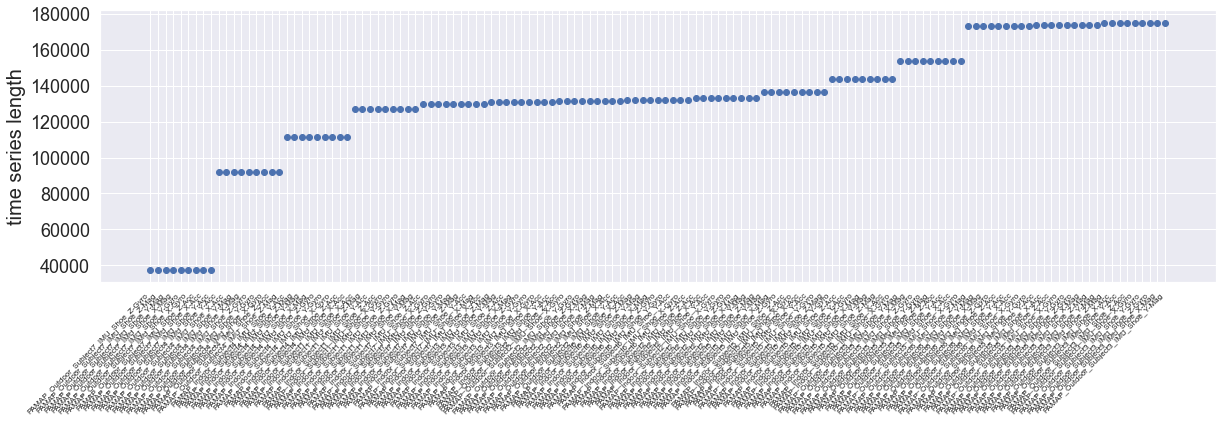

In [19]:
fontsize = 18

idx_sizes = np.argsort(df_ts.time_series.apply(len)).to_numpy()
_, ax = plt.subplots(1, figsize=(20, 5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.time_series.apply(len).to_numpy()[idx_sizes])
ax.set_ylabel("time series length", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.xticks(range(df_ts.shape[0]), df_ts["name"].iloc[idx_sizes], rotation=45, ha="right", fontsize=8)

plt.show()

{1: 9, 4: 9, 6: 9, 8: 108}


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3464/3052992741.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3464/3052992741.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


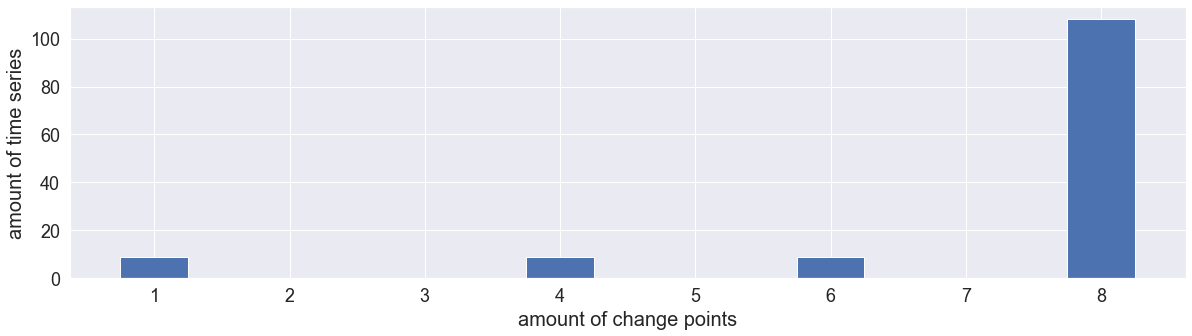

In [20]:
fontsize = 18

change_points, counts = np.unique(df_ts["change_points"].apply(len), return_counts=True)
_, ax = plt.subplots(1, figsize=(20, 5))
ax.bar(change_points, counts, width=.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

print(dict(zip(change_points, counts)))

ax.set_xlabel("amount of change points", fontsize=20)
ax.set_ylabel("amount of time series", fontsize=20)

plt.show()

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3464/2266537419.py:9: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3464/2266537419.py:12: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


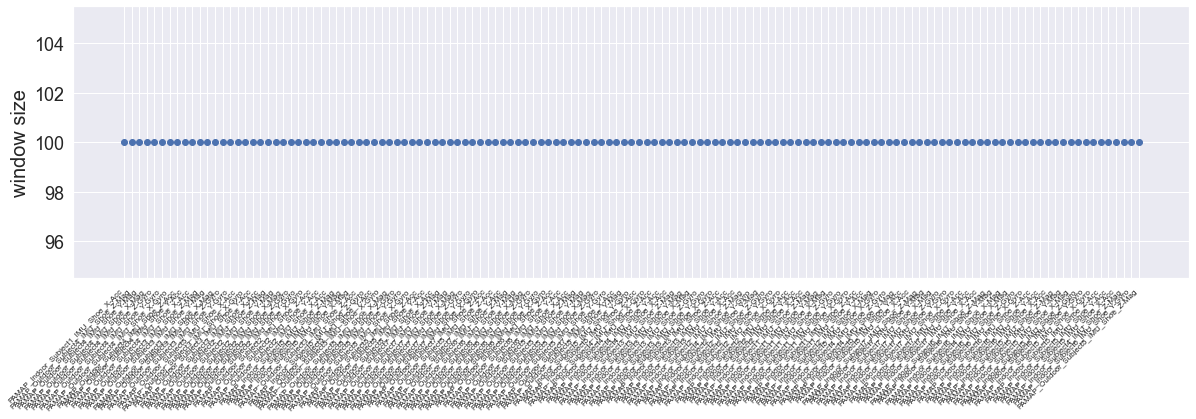

In [21]:
fontsize = 18

idx_sizes = np.argsort(df_ts.window_size.to_numpy())
_, ax = plt.subplots(1, figsize=(20, 5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.window_size.to_numpy()[idx_sizes])
ax.set_ylabel("window size", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.xticks(range(df_ts.shape[0]), df_ts["name"].iloc[idx_sizes], rotation=45, ha="right", fontsize=8)

plt.show()